In [55]:
# data handling libraries
import numpy as np
import pandas as pd

# Time for proccesses
import time

# Data obtension
import requests
import json

# Data visualization
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import os

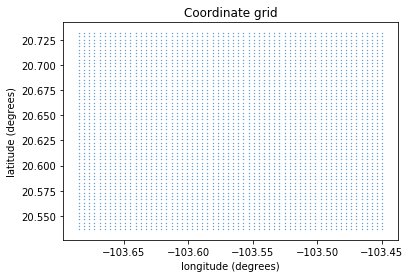

In [3]:
# Determine geospacial delimitations for the Primavera Forest 

x1, y1 = 20.730654, -103.684725
x2, y2 = 20.536931, -103.684725
x3, y3 = 20.536931, -103.449552
x4, y4 = 20.731724, -103.449552

x = [x1,x2,x3,x4]
y = [y1,y2,y3,y4]

# Generate a grid for the data points:
x_grid = np.linspace(min(x), max(x),60)
y_grid = np.linspace(min(y), max(y),60)
grid = [[x,y] for x in x_grid for y in y_grid]

# Convert into dataframe to handle data better:
grid_df = pd.DataFrame(grid, columns=['lat','lon'])

# plot the grid
plt.scatter(grid_df.lon,grid_df.lat, s=.1)
plt.title('Coordinate grid')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')
plt.show()

In [4]:
# Generate a perimeter (polygon) for the visualization on a map

# Data on a json-style architecture
primavera = {'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [
    [[-103.684725,20.730654],
    [-103.684725, 20.536931],
    [-103.449552, 20.536931],
    [-103.449552, 20.730654],
    [-103.684725, 20.730654]]]},
 'id': '1'}

fig = go.Figure(go.Choroplethmapbox(geojson=primavera, locations=list('1'), z=[10],
                                    colorscale="Earth", zmin=0, zmax=12,
                                    marker_opacity=.5, marker_line_width=5, showscale=False))

fig.update_layout(mapbox_style='stamen-terrain') #NICE
                                    
# Other styles
#fig.update_layout(mapbox_style='open-street-map')  # NICE
#fig.update_layout(mapbox_style='carto-positron')
#fig.update_layout(mapbox_style='stamen-toner') 
#fig.update_layout(mapbox_style='stamen-watercolor')

fig.update_layout(mapbox_zoom=10.7, mapbox_center = {"lat": (max(x)+min(x))/2, "lon":(max(y)+min(y))/2} )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [197]:
# Plot the grid on the map

fig = px.scatter_mapbox(grid_df, lat='lat' , lon='lon', zoom=10.8)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [6]:
# Use a dataset for the heatpoints obtained by a satelite on:
# http://www.marn.gob.sv/mapas-de-puntos-de-calor/

# Dataframe for the information
heat_points = pd.read_csv('./puntos_calor_estado_1_1-14_2000-01-01_2019-08-18_1566202819_65/puntos_calor_estado_1_1-14_2000-01-01_2019-08-18_1566202819_65/puntos_calor_estado_1_1-14_2000-01-01_2019-08-18_1566202819_65.csv')

# function to replace the latlon column and generate both a latitude and longitude column.
def lat_replace(x):
    alpha = x.replace('POINT','').replace('(', '').replace(')','').split(' ')
    return float(alpha[0])

def lon_replace(x):
    alpha = x.replace('POINT','').replace('(', '').replace(')','').split(' ')
    return float(alpha[1])

heat_points['lat'] = heat_points.latlon.apply(lat_replace)
heat_points['lon'] = heat_points.latlon.apply(lon_replace)

# Drop non-useful columns
heat_points.drop(['latlon', 'id_pais', 'id_estado','nom_pais', 'nom_estado'], axis=1, inplace=True)

# Filter by the desired coordinates (inside the bosque de la primavera perimeter)
interest_heat_points = heat_points[(heat_points.lon >= min(x))&(heat_points.lon <= max(x))&(heat_points.lat >= min(y))&(heat_points.lat <= max(y))]

fig = px.scatter_mapbox(interest_heat_points, lat="lon", lon="lat", color='pendiente', zoom=10.8)

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [201]:
# API Consumption, do not run unless you know what you are doing

keys = ['8b88d255188e5b91c360c8820f851209','f6a3f1451c57f3c47462789d7fd7db67','0184dd7d5e28a74578c3d896ec8ba417', '16128d728acfa488b037d5752b4dad5c']
url = 'https://api.darksky.net/forecast/'
info4 = []
count=0
key=0
val=0
#val = grid.index(coordinate)

for coordinate in grid[val:]:
    loc_time = (f'{coordinate[0]},{coordinate[1]},1555200000')
    information = requests.get(f'{url}{keys[key]}/{loc_time}').json()
    info4.append(information)
    count += 1
    if count == 900:
        count = 0
        key += 1
    time.sleep(.03)

# Change name of file to avoid overwriting
date = '04_14_2019_f'

os.mkdir(f'./fig/{date}')
with open(f'{date}.json', 'w') as fout:
    json.dump(info4, fout)


# If already generated use this code
#with open('info_file') as fout:
#    info = json.load(fout)

In [202]:
current_info = [info4[i]['currently'] for i in range(len(info4))]
information = pd.DataFrame(current_info)
information['longitude'] = grid_df.lon
information['latitude'] = grid_df.lat
information

time summary       icon  precipIntensity  precipProbability  \
0     1555200000   Clear  clear-day                0                  0   
1     1555200000   Clear  clear-day                0                  0   
2     1555200000   Clear  clear-day                0                  0   
3     1555200000   Clear  clear-day                0                  0   
4     1555200000   Clear  clear-day                0                  0   
...          ...     ...        ...              ...                ...   
3595  1555200000   Clear  clear-day                0                  0   
3596  1555200000   Clear  clear-day                0                  0   
3597  1555200000   Clear  clear-day                0                  0   
3598  1555200000   Clear  clear-day                0                  0   
3599  1555200000   Clear  clear-day                0                  0   

      temperature  apparentTemperature  dewPoint  humidity  pressure  \
0           81.62                81.62     21.06      0.11   1003.03   
1           82.24                82.24     21.01      0.10   1003.02   
2           82.78                82.78     20.96      0.10   1003.02   
3           83.06                83.06     20.91      0.10   1003.02   
4           83.14                83.14     20.86      0.10   1003.02   
...           ...                  ...       ...       ...       ...   
3595        80.79                80.79     15.84      0.09   1003.14   
3596        80.84                80.84     15.77      0.09   1003.13   
3597        80.87                80.87     15.71      0.09   1003.13   
3598        80.88                80.88     15.64      0.09   1003.12   
3599        80.90                80.90     15.57      0.09   1003.11   

      windSpeed  windGust  windBearing  cloudCover  uvIndex  visibility  \
0          6.16     13.52          213           0        1       9.997   
1          6.19     13.56          213           0        1       9.997   
2          6.22     13.60          214           0        1       9.997   
3          6.25     13.63          214           0        1       9.997   
4          6.28     13.67          215           0        1       9.997   
...         ...       ...          ...         ...      ...         ...   
3595       7.59     15.74          256           0        1       9.997   
3596       7.59     15.73          256           0        1       9.997   
3597       7.58     15.72          255           0        1       9.997   
3598       7.58     15.72          255           0        1       9.997   
3599       7.58     15.71          255           0        1       9.997   

      ozone   longitude   latitude  
0     257.2 -103.684725  20.536931  
1     257.1 -103.680739  20.536931  
2     257.1 -103.676753  20.536931  
3     257.1 -103.672767  20.536931  
4     257.0 -103.668781  20.536931  
...     ...         ...        ...  
3595  257.3 -103.465496  20.731724  
3596  257.3 -103.461510  20.731724  
3597  257.2 -103.457524  20.731724  
3598  257.2 -103.453538  20.731724  
3599  257.2 -103.449552  20.731724  

[3600 rows x 19 columns]

In [203]:
information.describe().T
information = information[['time','temperature', 'dewPoint', 'humidity', 'windSpeed', 'windGust', 
                           'windBearing', 'cloudCover', 'longitude', 'latitude']]

In [204]:
met_correlations = information[['temperature','dewPoint','humidity', 'windSpeed', 'windGust']].corr()
met_correlations

temperature  dewPoint  humidity  windSpeed  windGust
temperature     1.000000  0.182706 -0.763821  -0.467691  0.041674
dewPoint        0.182706  1.000000  0.434322  -0.793109 -0.372094
humidity       -0.763821  0.434322  1.000000  -0.088258 -0.326769
windSpeed      -0.467691 -0.793109 -0.088258   1.000000  0.678592
windGust        0.041674 -0.372094 -0.326769   0.678592  1.000000

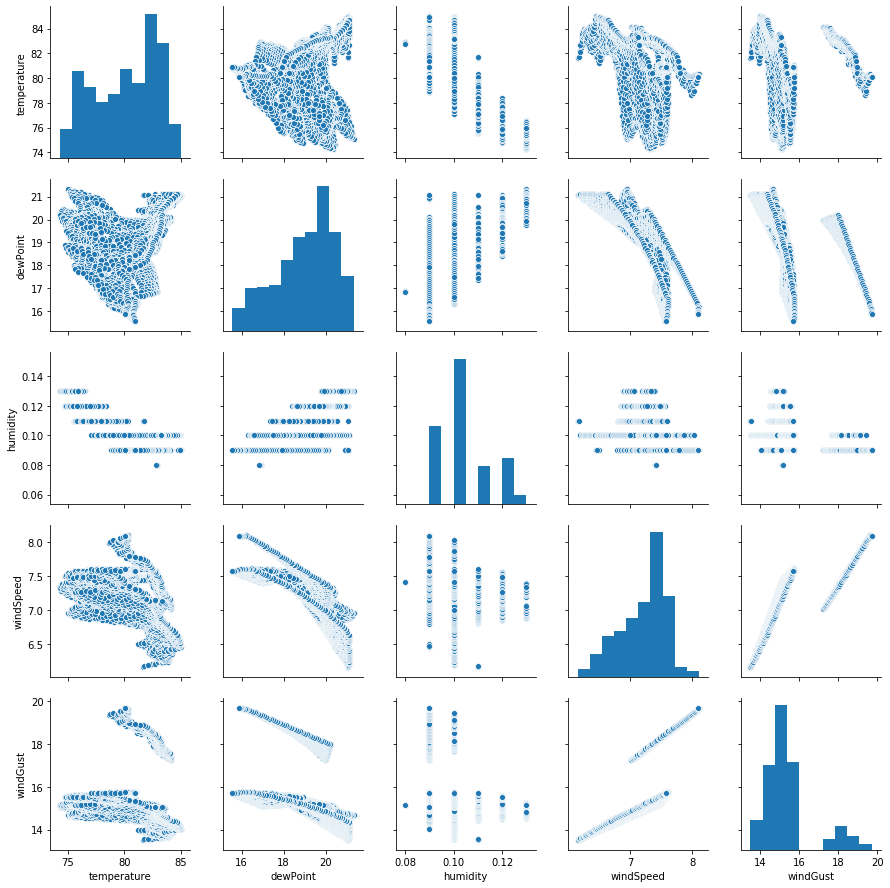

In [205]:
sns.pairplot(information[['temperature','dewPoint','humidity', 'windSpeed', 'windGust']])

In [206]:
temperature = np.split(np.array(information.temperature), len(x_grid))[::-1]
humidity  = np.split(np.array(information.humidity), len(x_grid))[::-1]
dewPoint = np.split(np.array(information.dewPoint), len(x_grid))[::-1]
windSpeed = np.split(np.array(information.windSpeed), len(x_grid))[::-1]
windGust = np.split(np.array(information.windGust), len(x_grid))[::-1]
windBearing = np.split(np.array(information.windBearing), len(x_grid))[::-1]

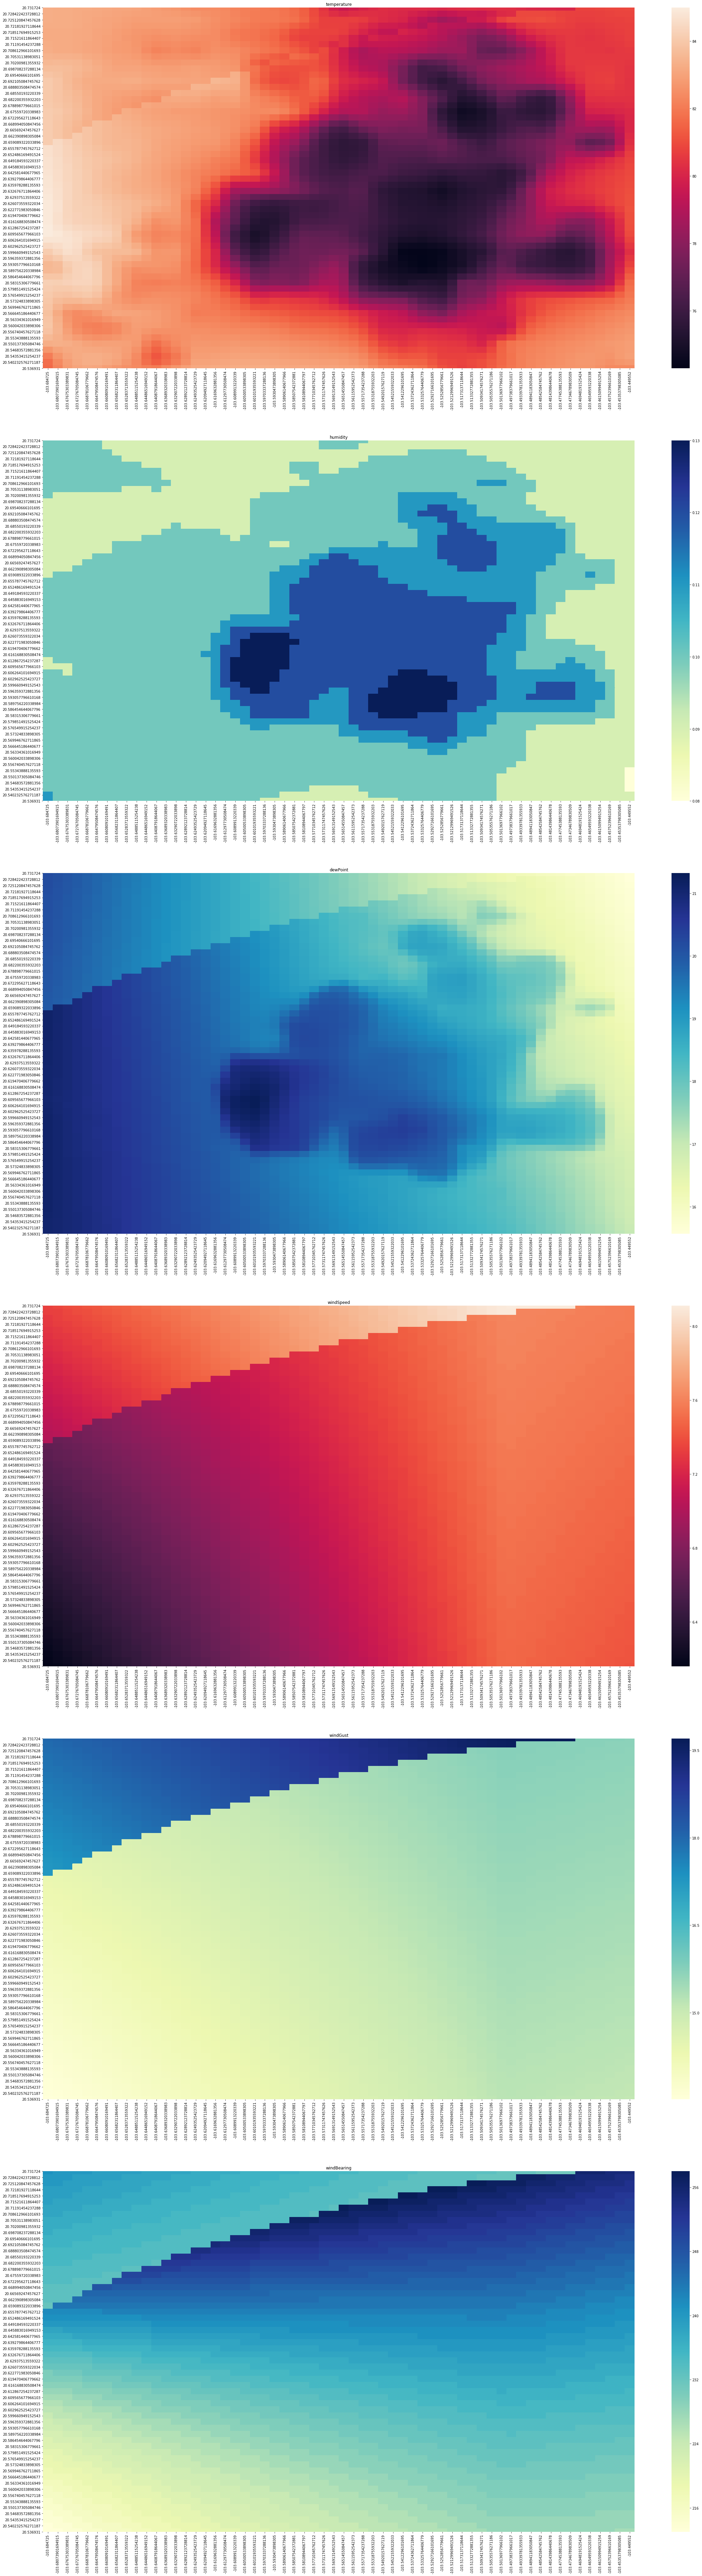

In [207]:
plt.subplot(711)
sns.heatmap(temperature , xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('temperature')
plt.subplots_adjust(left=0,right=5, top=30, bottom=.0)
plt.savefig(f'./fig/{date}/00.png')


plt.subplot(712)
sns.heatmap(humidity, cmap='YlGnBu', xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('humidity')


plt.subplot(713)
sns.heatmap(dewPoint, cmap='YlGnBu', xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('dewPoint')


plt.subplot(714)
sns.heatmap(windSpeed, xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('windSpeed')


plt.subplot(715)
sns.heatmap(windGust, cmap='YlGnBu', xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('windGust')


plt.subplot(716)
sns.heatmap(windBearing, cmap='YlGnBu', xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('windBearing')


plt.subplots_adjust(left=0,right=5, top=30, bottom=.0)


/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the e

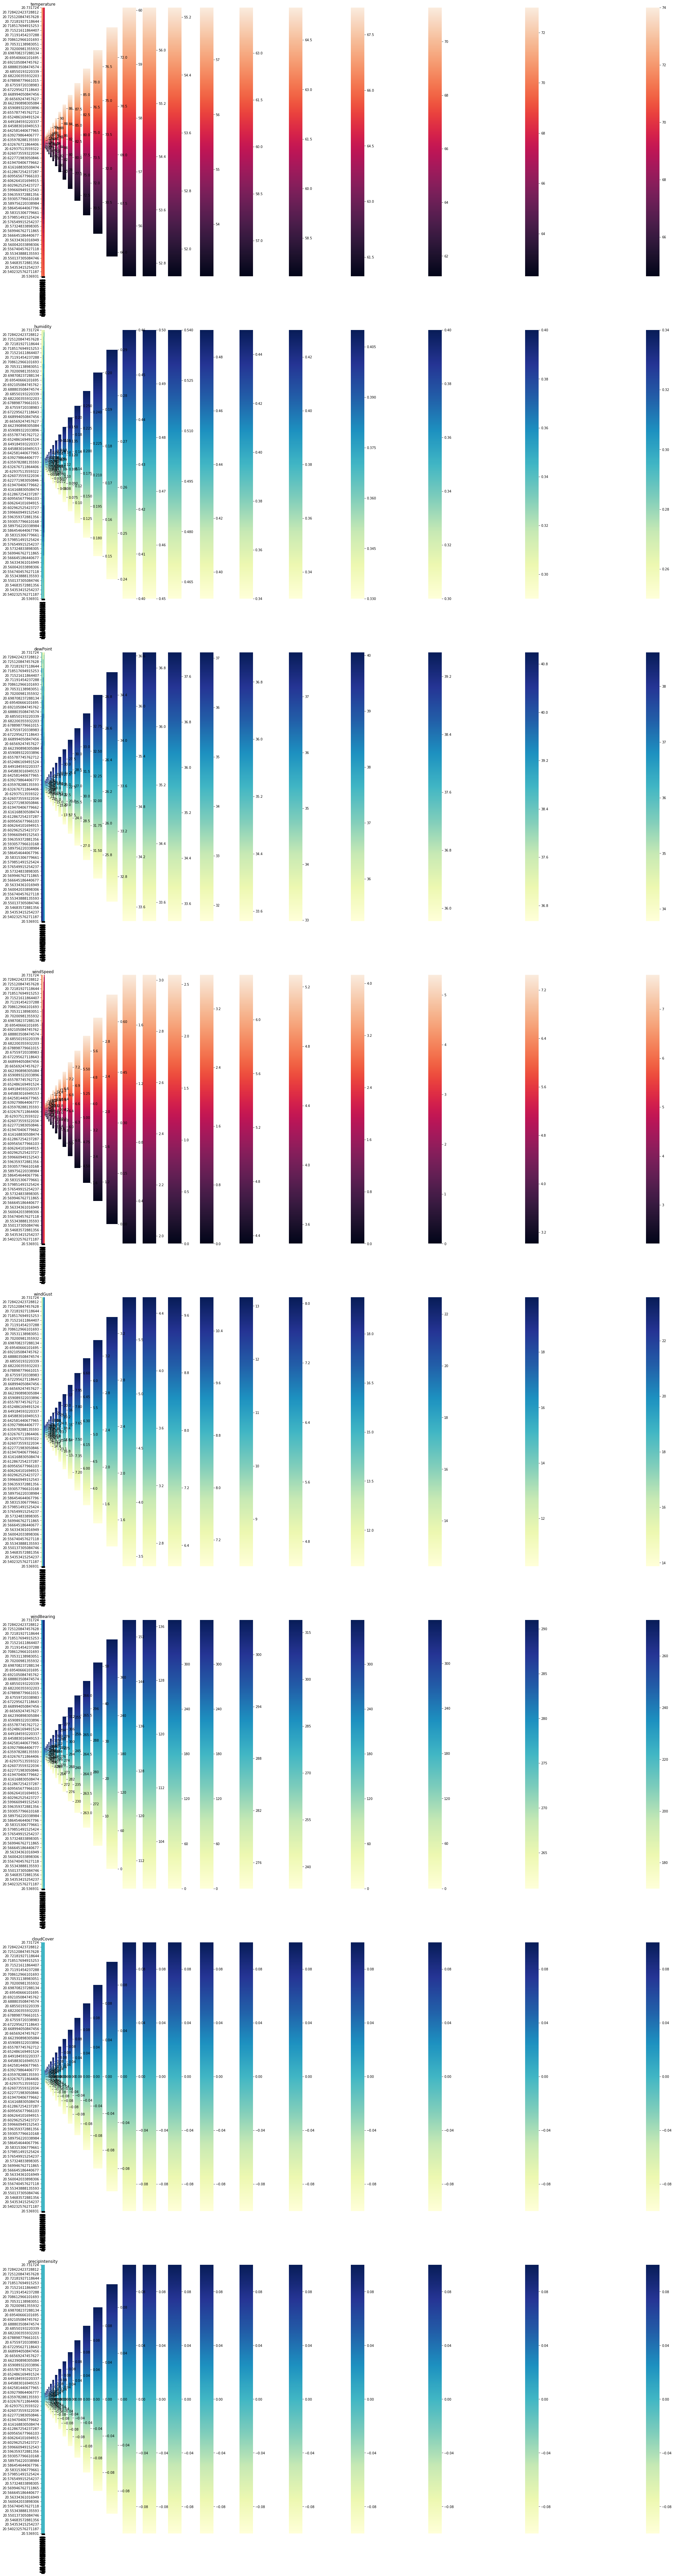

In [57]:
for j in range(24):
    hourly_data = [info4[i]['hourly']['data'][j] for i in range (len(info4))]
    hourly_data = pd.DataFrame(hourly_data)

    temperature = np.split(np.array(hourly_data.temperature), len(x_grid))[::-1]
    humidity  = np.split(np.array(hourly_data.humidity), len(x_grid))[::-1]
    dewPoint = np.split(np.array(hourly_data.dewPoint), len(x_grid))[::-1]
    windSpeed = np.split(np.array(hourly_data.windSpeed), len(x_grid))[::-1]
    windGust = np.split(np.array(hourly_data.windGust), len(x_grid))[::-1]
    windBearing = np.split(np.array(hourly_data.windBearing), len(x_grid))[::-1]
    cloudCover = np.split(np.array(hourly_data.cloudCover), len(x_grid))[::-1]
    #ozone = np.split(np.array(hourly_data.ozone), len(x_grid))[::-1]
    precipIntensity = np.split(np.array(hourly_data.precipIntensity), len(x_grid))[::-1]
    #pressure = np.split(np.array(hourly_data.pressure), len(x_grid))[::-1]

    plt.subplot(9,1,1)
    sns.heatmap(temperature,xticklabels=y_grid, yticklabels=x_grid[::-1])
    plt.title('temperature')

    plt.subplot(9,1,2)
    sns.heatmap(humidity, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
    plt.title('humidity')

    plt.subplot(9,1,3)
    sns.heatmap(dewPoint, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
    plt.title('dewPoint')

    plt.subplot(9,1,4)
    sns.heatmap(windSpeed, xticklabels=y_grid, yticklabels=x_grid[::-1])
    plt.title('windSpeed')

    plt.subplot(9,1,5)
    sns.heatmap(windGust, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
    plt.title('windGust')

    plt.subplot(9,1,6)
    sns.heatmap(windBearing, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
    plt.title('windBearing')

    plt.subplot(9,1,7)
    sns.heatmap(cloudCover, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
    plt.title('cloudCover')

    plt.subplot(9,1,8)
    sns.heatmap(precipIntensity, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
    plt.title('precipIntensity')

    plt.subplots_adjust(left=0,right=5, top=30, bottom=.0)
    if j<10:
        plt.savefig(f'./fig/{date}/0{j+1}.png')
    elif j>=10:
        plt.savefig(f'./fig/{date}/{j+1}.png')

In [108]:
import numpy as np
import plotly.figure_factory as ff
x1,y1 = np.meshgrid(x_grid,y_grid)
u1 = np.ones(len(x_grid))#np.array(windSpeed)/300
v1 = np.ones(len(x_grid))#np.sin(x1*10)*(.52)

fig = ff.create_quiver(y1, x1, u1, v1, line=dict(width=.1))
#fig2 = ff.create_streamline(x_grid, y_grid, u1, v1, arrow_scale=.1)

fig.show()

IndexError: list index out of range

In [ ]:
forest_fire = [pd.read_excel(f'./Serie_historica_anual_incendios_(20{i}).xlsx') for i in range(10,18)]
forest_fire[-1].columns

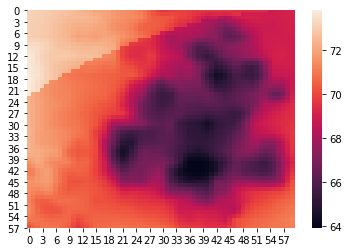

In [180]:
sns.heatmap(temperature)

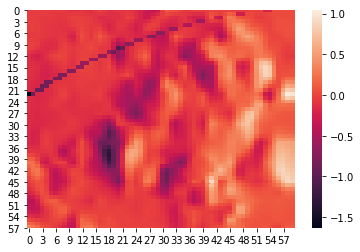

In [191]:
x, y = np.meshgrid(x_grid,y_grid)
#h = plt.contourf(x,y[::-1],h2[-1])
h2 = np.gradient(temperature)
sns.heatmap(h2[1])

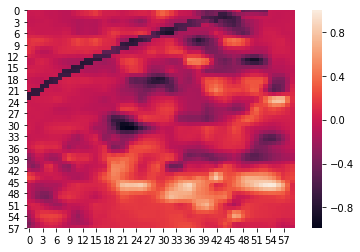

In [192]:
sns.heatmap(h2[0])

In [ ]:
for element in forest_fire:
    print(set(element.columns))
    print('')